In [1]:
import sys
sys.path.append("..")
from roeProcessTools import *

In [2]:
dirPath = "/Users/zch/Desktop/internship/data/"
paths = {"chem":"chemClean32.xlsx", "mach":"machClean32.xlsx", "food":"foodClean32.xlsx", "elec":"elecClean32.xlsx"}

In [21]:
df = pd.read_excel(dirPath+paths["chem"])

## 思路一
1. 除最后一个上升的极值点外，提取后3个极值，极值差应当超过阈值，认为有波动，设置可以容忍的threshold
2. 设置一个high threshold，不超过high的认为不在高位，比如可以设置成75%分位点
3. 对于连续上升的最后一个极值，同样设置一个threshold比如1，认为上升总值超过1才算是上升，否则认为是波动
- 是不是和第一条重复
4. 需要判断两个时期上升，~~order=2可以判断？~~不可以判断，需要重新判断

### 思路一  4
判断连续时期上升的问题

In [23]:
# 先解决4
a = np.array([3, 2, 1, 2])
signal.argrelextrema(a, np.greater_equal, order=4)

(array([0]),)

In [27]:
# 通过时间判断? 或许可以直接通过maxIdx和minIdx判断 先不判断了
# 000698 沈阳化工为例
code = "000698"
company, y = getCompanyByCode(code, df)
yRolling = getYRolling(y, n=8, gaussian=True, center=False)
yRolling.dropna(inplace=True)
maxIdx, minIdx = getExtreme(yRolling, order=4)

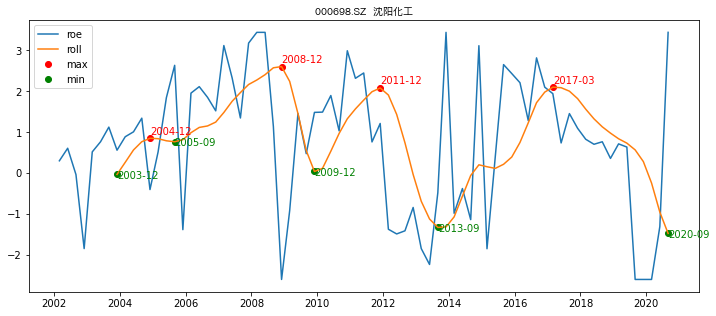

In [28]:
showOne(code, company, n=8, gaussian=True, center=False, order=4)